RuntimeError: x must be a sequence

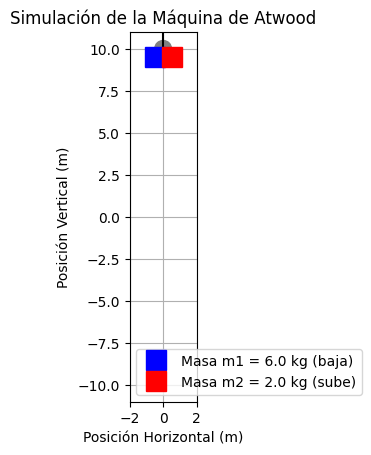

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# --- PASO 1: Definir la Física del Sistema ---
# Parámetros que puedes cambiar
m1 = 6.0  # kg (masa más pesada)
m2 = 2.0  # kg (masa más ligera)
g = 9.8   # m/s^2

# Calculamos la aceleración usando la fórmula que derivamos.
# Esta es la "inteligencia" de nuestra simulación.
a = (m1 - m2) * g / (m1 + m2)

# --- PASO 2: Configurar el Escenario Gráfico ---
fig, ax = plt.subplots()
ax.set_xlim(-2, 2)
ax.set_ylim(-11, 11)
ax.set_aspect('equal') # Asegura que el círculo de la polea se vea como un círculo
ax.grid()
ax.set_title('Simulación de la Máquina de Atwood')
ax.set_xlabel('Posición Horizontal (m)')
ax.set_ylabel('Posición Vertical (m)')

# Dibujar los elementos estáticos
polea = plt.Circle((0, 10), 0.5, color='gray', fill=True)
ax.add_patch(polea)
soporte = plt.Line2D([0, 0], [10, 11], color='black')
ax.add_line(soporte)

# Dibujar los elementos que se moverán (en su posición inicial t=0)
# Guardamos estos objetos en variables para poder actualizarlos después
pos_inicial_y = 9.5 # Justo debajo de la polea
# La cuerda se representa con dos segmentos
cuerda1, = ax.plot([-0.5, -0.5], [pos_inicial_y, 10], color='black')
cuerda2, = ax.plot([0.5, 0.5], [pos_inicial_y, 10], color='black')
# Las masas se representan como cuadrados
masa1, = ax.plot(-0.5, pos_inicial_y, 's', markersize=15, color='blue', label=f'Masa m1 = {m1} kg (baja)')
masa2, = ax.plot(0.5, pos_inicial_y, 's', markersize=15, color='red', label=f'Masa m2 = {m2} kg (sube)')
ax.legend()


# --- PASO 3: Definir la Lógica de la Animación ---

# Esta función se llama al principio para establecer el fondo
def init():
    masa1.set_data(-0.5, pos_inicial_y)
    masa2.set_data(0.5, pos_inicial_y)
    cuerda1.set_data([-0.5, -0.5], [pos_inicial_y, 10])
    cuerda2.set_data([0.5, 0.5], [pos_inicial_y, 10])
    return masa1, masa2, cuerda1, cuerda2

# Esta función se llama para cada fotograma de la animación
def update(frame):
    # 'frame' es el número del fotograma, lo usamos para calcular el tiempo
    # dt es el tiempo entre fotogramas (definido en 'interval' abajo)
    t = frame * 0.02  # Tiempo = fotograma * (20 ms / 1000 ms/s)

    # Calcular la nueva posición vertical usando la cinemática
    # y = y0 + v0*t + 0.5*a*t^2.  Aquí y0=0, v0=0.
    desplazamiento = 0.5 * a * t**2

    # m1 baja (desplazamiento negativo), m2 sube (desplazamiento positivo)
    y1 = pos_inicial_y - desplazamiento
    y2 = pos_inicial_y + desplazamiento

    # Actualizar la posición de los objetos en el gráfico
    masa1.set_data(-0.5, y1)
    masa2.set_data(0.5, y2)
    cuerda1.set_data([-0.5, -0.5], [y1, 10])
    cuerda2.set_data([0.5, 0.5], [y2, 10])
    
    return masa1, masa2, cuerda1, cuerda2

# --- PASO 4: Crear y Ejecutar la Animación ---

# Creamos la animación.
# 'fig' es nuestro escenario.
# 'update' es la función que dice cómo cambiar las cosas.
# 'frames' es cuántos fotogramas crear.
# 'init_func' es para preparar el primer fotograma.
# 'interval' es el tiempo en milisegundos entre fotogramas.
# 'blit=True' es una optimización para que sea más fluida.
ani = animation.FuncAnimation(fig, update, frames=100,
                              init_func=init, blit=True, interval=20)

# Guardar la animación como un archivo GIF
# (Puede tardar unos segundos en procesar)
try:
    ani.save('maquina_atwood.gif', writer='pillow', fps=50)
    print("Animación guardada como 'maquina_atwood.gif'")
except Exception as e:
    print(f"Error al guardar la animación: {e}")
    print("Asegúrate de tener la librería 'Pillow' instalada: pip install Pillow")

# Mostrar la animación (si ejecutas esto en un entorno interactivo)
plt.show()